In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
def generate_dataset():

    # set seed for reproducibility
    np.random.seed(5)

    # Synthetically generated random variables
    monthly_income = np.random.randint(1000, 10000, size=1000) # use random.Generator.integers instead
    time_of_month = np.random.randint(1, 32, size=1000)
    savings = np.random.choice(['low', 'medium', 'high'], size=1000)
    guests = np.random.binomial(1, 0.1, size=1000)

    # Function to determine quality_of_food based on the specified rules
    def determine_quality(income, time, savings, guests):
        # Determine quality based on income
        quality_based_on_income = np.where(
            income >= 7000, 5, 
            np.where(income >= 4000, 4, 
            np.where(income >= 3000, 3, 
            np.where(income >= 2000, 2, 1)))
            )


        # Determine quality based on time of month
        quality_based_on_time = np.where(time >= 16, 1, 5)


        # Determine quality based on size of savings
        quality_based_on_savings = np.where(savings == 'high', 5, np.where(savings == 'medium', 3, 1))

        # Determine quality based on number of guests
        quality_based_on_guests = np.where(
            guests == 0, 3, 5
        )
        # work on not hard-coding the values for guests  # TODO
        #np.where(
            #guests == 0, 
            #np.random.choice([1, 2, 3, 4, 5], p=[0.2, 0.2, 0.2, 0.2, 0.2]), 
            #np.random.choice([1, 4, 5], p=[0.01, 0.49, 0.5])
            #)


        # Combine the factors to get the final quality_of_food
        quality_of_food = (quality_based_on_income * 0.4 + quality_based_on_time * 0.1 + quality_based_on_savings * 0.2 + quality_based_on_guests * 0.3) / 1
        noise = np.random.normal(scale = 1, size=len(quality_of_food))  # Introduce random noise
        quality_of_food += noise
        quality_of_food = np.clip(quality_of_food, 1, 5)  # Clip values to ensure they are in the desired range
        # round to 2 decimal places
        quality_of_food = np.round(quality_of_food, 2)

        return quality_of_food.astype(float)

    # Generate quality_of_food based on the rules
    quality_of_food = determine_quality(monthly_income, time_of_month, savings, guests)

    # Create bin_edges for the quality_of_food for visualization
    bin_edges = np.where(quality_of_food <= 1, 1, np.where(quality_of_food <= 2, 2, np.where(quality_of_food <= 3, 3, np.where(quality_of_food <= 4, 4, 5))))

    # Combine all variables into a dataset
    dataset = {
        'quality_of_food': quality_of_food,
        'monthly_income': monthly_income,
        'time_of_month': time_of_month,
        'savings': savings,
        'guests': guests,
        'bin_edges': bin_edges
    }

    df = pd.DataFrame(dataset)

    return df

# Generate the dataset
df = generate_dataset()



In [10]:
df.head(10)

,quality_of_food,monthly_income,time_of_month,savings,guests,bin_edges
0,1.54,3915,21,medium,0,2
1,2.95,3254,10,high,0,3
2,3.87,5079,12,medium,0,4
3,1.86,4046,4,medium,0,2
4,5.00,8286,2,medium,0,5
5,4.01,6520,6,medium,0,5
6,2.74,2032,12,medium,0,3
7,3.16,1740,28,low,0,4
8,3.24,2982,31,medium,0,4
9,3.49,3459,12,medium,0,4


In [ ]:
# visualize the data
# this chunk will work for integer data



# get all the plots in one figure
fig, axes = plt.subplots(2, 4, figsize=(20, 40))

sns.countplot(x='quality_of_food', hue='monthly_income', data=df, ax=axes[0, 0])
sns.boxplot(x='quality_of_food', y='monthly_income', data=df, ax=axes[1, 0])
sns.countplot(x='quality_of_food', hue='time_of_month', data=df, ax=axes[0, 1])
sns.boxplot(x='quality_of_food', y='time_of_month', data=df, ax=axes[1, 1])
sns.countplot(x='quality_of_food', hue='savings', hue_order= ['low', 'medium', 'high'], data=df, ax=axes[0, 2])
sns.boxplot(x='quality_of_food', y='savings', order= ['low', 'medium', 'high'], data=df, ax=axes[1, 2])
sns.countplot(x='quality_of_food', hue='guests', data=df, ax=axes[0, 3])
sns.boxplot(x='guests', y='quality_of_food', data=df, ax=axes[1, 3])

# set title for each column
axes[0, 0].set_title('Monthly Income Countplot', fontsize=20)
axes[1, 0].set_title('Monthly Income Boxplot', fontsize=20)

axes[0, 1].set_title('Time of Month Countplot', fontsize=20)
axes[1, 1].set_title('Time of Month Boxplot', fontsize=20)

axes[0, 2].set_title('Savings Countplot', fontsize=20)
axes[1, 2].set_title('Savings Boxplot', fontsize=20)

axes[0, 3].set_title('Guests Countplot', fontsize=20)
axes[1, 3].set_title('Guests Boxplot', fontsize=20)

# set the title of the figure and place it at the top of the figure and minimize the space between the title and the figure
fig.suptitle('Quality of food purchased' , fontsize=30, y=.95)

# save the figure
plt.savefig('quality_of_food.png')

plt.show()

/Users/kristian/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


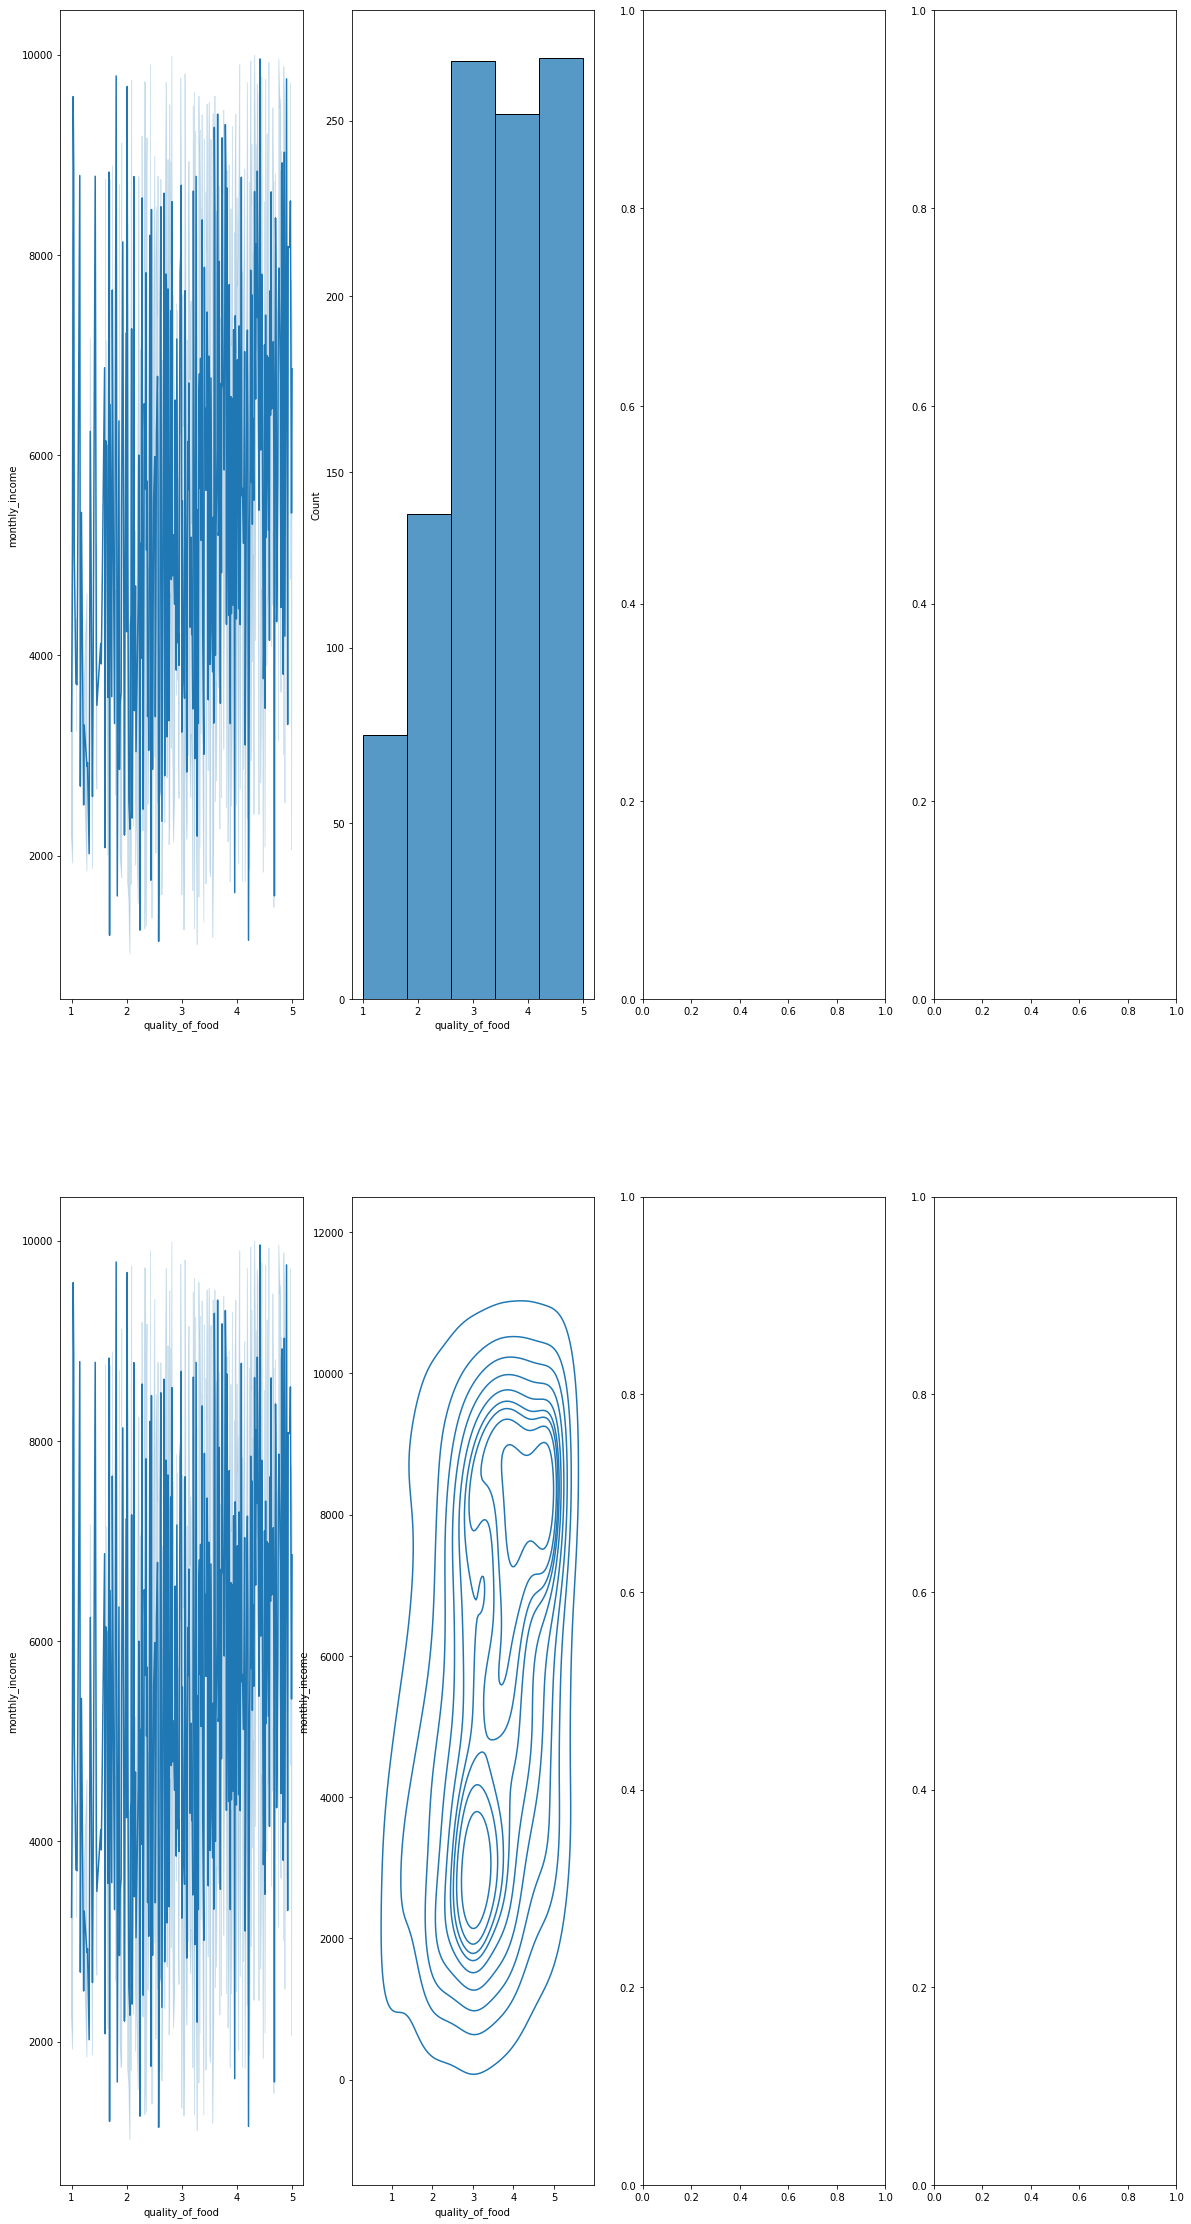

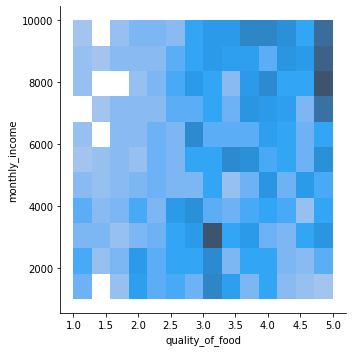

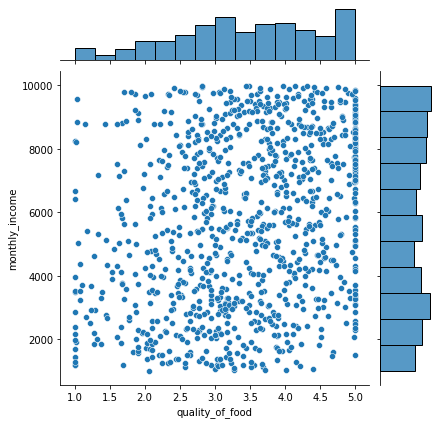

In [15]:
# visualize the data 
# this chunk will work for float data

# get all the plots in one figure
fig, axes = plt.subplots(2, 4, figsize=(20, 40))

# lineplot
sns.lineplot(x='quality_of_food', y='monthly_income', data=df, ax=axes[0, 0])
# mean lineplot
sns.lineplot(x='quality_of_food', y='monthly_income', data=df, estimator=np.mean, ax=axes[1, 0])

# histrogram with bins = 5
sns.histplot(x='quality_of_food', data=df, bins=5, ax=axes[0, 1])

# kdeplot
sns.kdeplot(x='quality_of_food', y='monthly_income', data=df, ax=axes[1, 1])

sns.displot(df, x = 'quality_of_food', y = 'monthly_income', ax=axes[0, 2])

sns.jointplot(x='quality_of_food', y='monthly_income', data=df, ax=axes[1, 2])


In [19]:
# remove bin_edges
df = df.drop('bin_edges', axis=1)

# rename quality_of_food to target
df = df.rename(columns={'quality_of_food': 'target'})

In [20]:
# write the data to a csv file
df.to_csv('quality_of_food.csv', index=False)

In [8]:
def generate_classification_dataset():

    # set seed for reproducibility
    np.random.seed(5)

    # Synthetically generated random variables
    monthly_income = np.random.randint(1000, 10000, size=1000) # use random.Generator.integers instead
    time_of_month = np.random.randint(1, 32, size=1000)
    savings = np.random.choice(['low', 'medium', 'high'], size=1000)
    guests = np.random.binomial(1, 0.1, size=1000)

    # Function to determine quality_of_food based on the specified rules
    def determine_quality(income, time, savings, guests):
        # Determine quality based on income
        quality_based_on_income = np.where(
            income >= 7000, 5, 
            np.where(income >= 4000, 4, 
            np.where(income >= 3000, 3, 
            np.where(income >= 2000, 2, 1)))
            )


        # Determine quality based on time of month
        quality_based_on_time = np.where(time >= 16, 1, 5)


        # Determine quality based on size of savings
        quality_based_on_savings = np.where(savings == 'high', 5, np.where(savings == 'medium', 3, 1))

        # Determine quality based on number of guests
        quality_based_on_guests = np.where(
            guests == 0, 3, 5
        )
        # work on not hard-coding the values for guests  # TODO
        #np.where(
            #guests == 0, 
            #np.random.choice([1, 2, 3, 4, 5], p=[0.2, 0.2, 0.2, 0.2, 0.2]), 
            #np.random.choice([1, 4, 5], p=[0.01, 0.49, 0.5])
            #)


        # Combine the factors to get the final quality_of_food
        quality_of_food = (quality_based_on_income * 0.4 + quality_based_on_time * 0.1 + quality_based_on_savings * 0.2 + quality_based_on_guests * 0.3) / 1
        noise = np.random.normal(scale = 1, size=len(quality_of_food))  # Introduce random noise
        quality_of_food += noise
        quality_of_food = np.clip(quality_of_food, 1, 5)  # Clip values to ensure they are in the desired range
        # round to 2 decimal places
        quality_of_food = np.round(quality_of_food, 2)

        return quality_of_food.astype(int)

    # Generate quality_of_food based on the rules
    quality_of_food = determine_quality(monthly_income, time_of_month, savings, guests)

    # Create bin_edges for the quality_of_food for visualization
    bin_edges = np.where(quality_of_food <= 1, 1, np.where(quality_of_food <= 2, 2, np.where(quality_of_food <= 3, 3, np.where(quality_of_food <= 4, 4, 5))))

    # Combine all variables into a dataset
    dataset = {
        'quality_of_food': quality_of_food,
        'monthly_income': monthly_income,
        'time_of_month': time_of_month,
        'savings': savings,
        'guests': guests,
        'bin_edges': bin_edges
    }

    df = pd.DataFrame(dataset)

    return df

# Generate the dataset
df = generate_classification_dataset()
    

In [5]:
df.head(10)

,quality_of_food,monthly_income,time_of_month,savings,guests,bin_edges
0,1,3915,21,medium,0,1
1,2,3254,10,high,0,2
2,3,5079,12,medium,0,3
3,1,4046,4,medium,0,1
4,5,8286,2,medium,0,5
5,4,6520,6,medium,0,4
6,2,2032,12,medium,0,2
7,2,1740,28,low,0,2
8,2,2982,31,medium,0,2
9,3,3459,12,medium,0,3


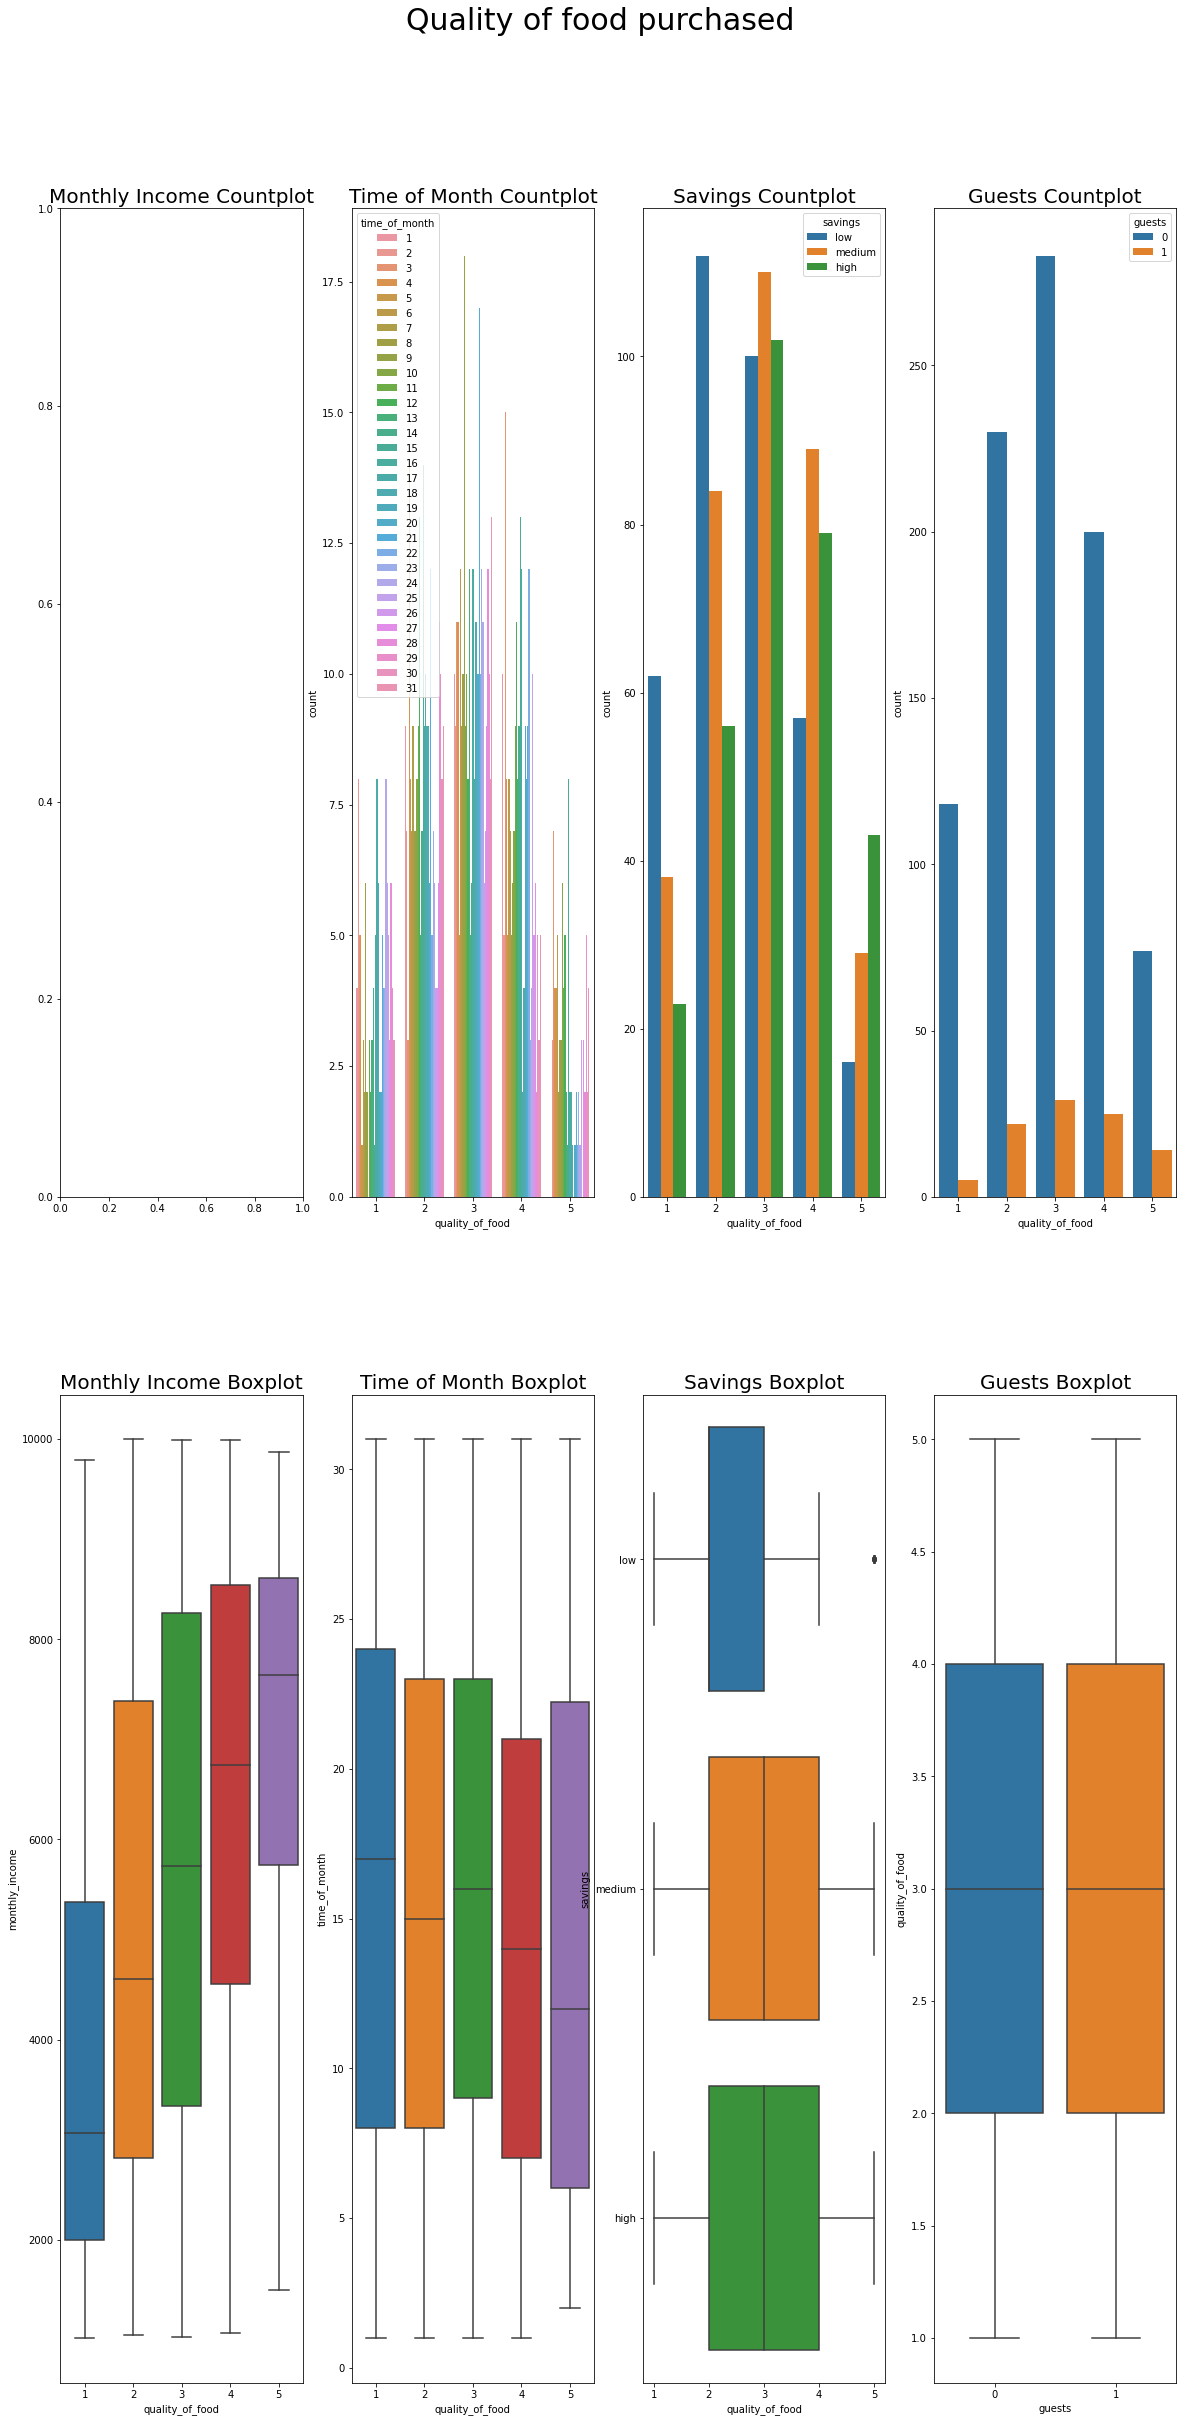

In [7]:
# visualize the data
# this chunk will work for integer data

fig, axes = plt.subplots(2, 4, figsize=(20, 40))


sns.boxplot(x='quality_of_food', y='monthly_income', data=df, ax=axes[1, 0])
sns.countplot(x='quality_of_food', hue='time_of_month', data=df, ax=axes[0, 1])
sns.boxplot(x='quality_of_food', y='time_of_month', data=df, ax=axes[1, 1])
sns.countplot(x='quality_of_food', hue='savings', hue_order= ['low', 'medium', 'high'], data=df, ax=axes[0, 2])
sns.boxplot(x='quality_of_food', y='savings', order= ['low', 'medium', 'high'], data=df, ax=axes[1, 2])
sns.countplot(x='quality_of_food', hue='guests', data=df, ax=axes[0, 3])
sns.boxplot(x='guests', y='quality_of_food', data=df, ax=axes[1, 3])

# set title for each column
axes[0, 0].set_title('Monthly Income Countplot', fontsize=20)
axes[1, 0].set_title('Monthly Income Boxplot', fontsize=20)

axes[0, 1].set_title('Time of Month Countplot', fontsize=20)
axes[1, 1].set_title('Time of Month Boxplot', fontsize=20)

axes[0, 2].set_title('Savings Countplot', fontsize=20)
axes[1, 2].set_title('Savings Boxplot', fontsize=20)

axes[0, 3].set_title('Guests Countplot', fontsize=20)
axes[1, 3].set_title('Guests Boxplot', fontsize=20)

# set the title of the figure and place it at the top of the figure and minimize the space between the title and the figure
fig.suptitle('Quality of food purchased' , fontsize=30, y=.95)

# save the figure
plt.savefig('quality_of_food_int.png')

plt.show()

In [10]:
# remove bin_edges
df = df.drop('bin_edges', axis=1)
# save the data to a csv file
df.to_csv('quality_of_food_int.csv', index=False)